In [2]:
!cd /home/blek/poc/ps/notebooks/
%matplotlib inline

In [15]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
dir_path = "../output/100k-2017-06-14-15h52m27s/"

In [5]:
metrics = pd.DataFrame.from_csv(f"{dir_path}/output.csv")

In [6]:
metrics

,metric,cutoff,fold,source,value
0,EPC,10,1,BPRMF,0.867695
1,EPC,10,1,BPRSLIM,0.874859
2,EPC,10,1,CofiRank,0.837226
3,EPC,10,1,ItemKNN,0.913645
4,EPC,10,1,LeastSquareSLIM,0.839202
5,EPC,10,1,MostPopular,0.777195
6,EPC,10,1,MultiCoreBPRMF,0.869979
7,EPC,10,1,SoftMarginRankingMF,0.881452
8,EPC,10,1,WRMF,0.849062
9,EPC,10,1,pureSVD,0.888613


In [7]:
def mean_value_by_metric(metric_name):
    eild_values = metrics[metrics.metric == metric_name][['fold', 'source', 'value']]
    return eild_values.groupby('source').mean().value

In [8]:
mean_metrics = pd.DataFrame({'eild': mean_value_by_metric('EILD'), 'epc': mean_value_by_metric('EPC')})
mean_metrics

,eild,epc
source,,
BPRMF,0.214035,0.866887
BPRSLIM,0.189864,0.872164
CofiRank,0.214464,0.839193
ItemKNN,0.178348,0.912283
LeastSquareSLIM,0.246554,0.833800
MostPopular,0.294239,0.767627
MultiCoreBPRMF,0.219526,0.864888
SoftMarginRankingMF,0.185142,0.882024
WRMF,0.243668,0.846097


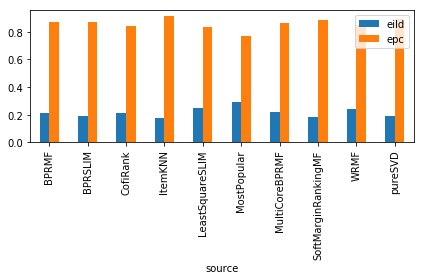

In [25]:
plt.clf()
bar_plot = mean_metrics.plot(kind='bar')
plt.tight_layout()
bar_plot
plt.savefig(f'{dir_path}/bar_plot.pdf')

In [10]:
metrics_for_scatter = pd.DataFrame({'map': mean_value_by_metric('MAP'), 'epc': mean_value_by_metric('EPC')})
metrics_for_scatter

,epc,map
source,,
BPRMF,0.866887,0.107411
BPRSLIM,0.872164,0.108739
CofiRank,0.839193,0.043782
ItemKNN,0.912283,0.084985
LeastSquareSLIM,0.833800,0.117482
MostPopular,0.767627,0.067950
MultiCoreBPRMF,0.864888,0.105674
SoftMarginRankingMF,0.882024,0.077458
WRMF,0.846097,0.136834


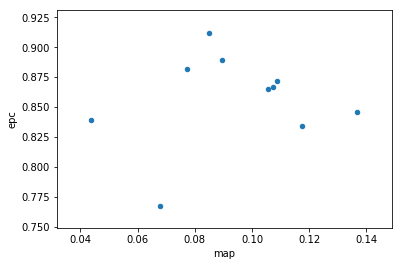

In [23]:
plt.clf()
scatter_plot = metrics_for_scatter.plot.scatter('map', 'epc')
scatter_plot
plt.savefig(f"{dir_path}/scatter_plot.pdf")